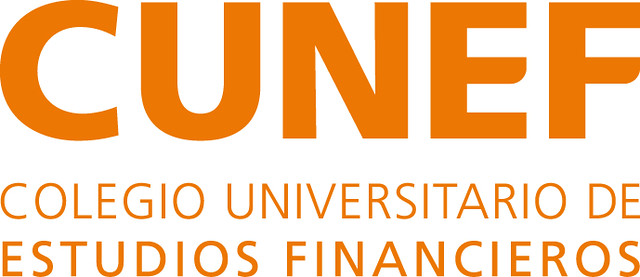

In [31]:
i = Image.open('..\data\logo_cunef.jpg', 'r')
i

# AUTOR: MARIO ARTECHE MIRANDA

# TRABAJO: DESCENSO DEL GRADIENTE

# TABLA DE CONTENIDOS
* [1. LIBRERIAS](#Instalamos-las-librerias:)   
* [2. LECTURA DE DATOS](#Leemos-nuestro-dataset:)   
* [3. DEFINICION DE VARIABLES](#Definimos-nuestras-variables:)    
* [4. VISUALIZACION DE DATOS](#Visualizamos-los-datos:)    
* [5. LOGISTICA Y SIGMOIDE](#Función-logística-y-sigmoide:)    
* [6. FUNCION DE COSTE Y GRADIENTE](#Definimos-la-función-de-coste-y-el-gradiente:)    
* [7. DESCENSO DEL GRADIENTE](#Descenso-del-gradiente:)   
* [8. CONVERGENCIA](#Representamos-la-convergencia-el-punto-de-menor-coste:)   

# Instalamos las librerias:

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# Leemos nuestro dataset:

In [6]:
df = pd.read_csv("../data/4_1_data.csv")

In [7]:
df.head(5)

score-1    score-2  label
0  34.623660  78.024693      0
1  30.286711  43.894998      0
2  35.847409  72.902198      0
3  60.182599  86.308552      1
4  79.032736  75.344376      1

# Definimos nuestras variables:

In [8]:
x = df.iloc[:,[0,1]] # seleccionamos mediante iloc todas las filas de las columnas score-1 y score-2 y las guardamos en el objeto x
y = df.iloc[:,2]    # seleccionamos mediante iloc todas las filas de las columnas score-1 y score-2 y las guardamos en el objeto x

In [9]:
round(x.head(),2) #redondeamos a 2 decimales el dataframe de las variables x (scores)

score-1  score-2
0    34.62    78.02
1    30.29    43.89
2    35.85    72.90
3    60.18    86.31
4    79.03    75.34

In [10]:
y.head() # observamos que contiene el dataframe y

0    0
1    0
2    0
3    1
4    1
Name: label, dtype: int64

In [11]:
len(x) # vemos la longitud de el dataframe x

100

In [12]:
len(y) # hacemos lo mismo con el dataframe y

100

In [13]:
df.info() #observamos el tipo de variables que contiene nuestro dataframe (completo)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   score-1  100 non-null    float64
 1   score-2  100 non-null    float64
 2   label    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [14]:
# renombramos los data frames x e y para representarlos graficamente y tener mas claro que es lo que estamos haciendo
scores = df.iloc[:,[0,1]].values
label = df.iloc[:,2].values

# Visualizamos los datos:

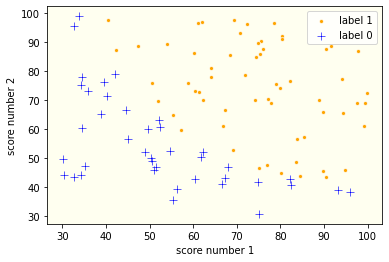

In [15]:
passed = (label == 1).reshape(100, 1) #definimos el objeto passed para aquellos casos en los que nuestro df y es igual a 1.
failed = (label == 0).reshape(100, 1) #definimos el objeto passed para aquellos casos en los que nuestro df y es igual a 0.

ax = sns.scatterplot(x = scores[passed[:, 0], 0], #seleccionamos los aprobados de las 2 columnas del df x.
                     y = scores[passed[:, 0], 1],
                     marker = ".",
                     color = "orange",
                     s = 60)
sns.scatterplot(x = scores[failed[:, 0], 0], #seleccionamos los suspensos de las 2 columnas del df x.
                y = scores[failed[:, 0], 1],
                marker = '+',
                color = "blue",
                s = 60)
ax.set_facecolor("ivory")
ax.set(xlabel="score number 1", ylabel="score number 2") # definimos los ejes x e y
ax.legend(["label 1", "label 0"]) #establecemos la leyenda
plt.show(); #instrucción para que represente el gráfico


# Función logística y sigmoide:

#### COMENTARIOS: 
La función sigmoide transforma los valores introducidos a una escala (0,1), donde los valores altos tienen de manera asintótica a 1 y los valores muy bajos tienden de manera asintótica a 0.

Características de la función signoide:   

Satura y mata el gradiente.   
Lenta convergencia.   
No esta centrada en el cero.   
Esta acotada entre 0 y 1.   
Buen rendimiento en la última capa.   

In [16]:
def logistic_function(x):    #definimos la funcion sigmoide
    return 1/ (1 + np.exp(-x))

In [17]:
logistic_function(0) #comprobamos que la funcion definida funciona correctamente ya el resultado sería 1/2

0.5

# Definimos la función de coste y el gradiente:

In [18]:
def compute_cost(theta, x, y): #funcion de coste, la cual hace la diferencia entre el valor real y la predicción
    m = len(y) #numero de observaciones
    y_pred = logistic_function(np.dot(x , theta)) #realizamos el producto escalar de la matriz x con theta
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred)) #calculamos el error
    cost = -1 / m * sum(error) #definimos el coste
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y)) #el gradiente se obtiene de la siguiente manera:
        #1/el numero de observaciones
        #el producto escalar de la transpuesta de x por (la y predicha - la y)
        
    return cost[0] , gradient #calculamos el gradiente a partir del primer punto para ir analizando su evolución
    

In [19]:
mean_scores = np.mean(scores, axis=0) # creamos un vector con la media de las notas
std_scores = np.std(scores, axis=0) #creamos un vector con la dsviación típica de las notas
scores = (scores - mean_scores) / std_scores # estandarizamos las notas en un vector, lo cual nos ahorra tiempo en la busqueda del minimo coste

rows = scores.shape[0] #cogemos el numero de filas 
cols = scores.shape[1] #cogemos el numero de columnas

X = np.append(np.ones((rows, 1)), scores, axis=1) #y=x1+x2+b(intercepto-->como vector de unos)
y = label.reshape(rows, 1)#redefinimos el formato de y 

theta_init = np.zeros((cols + 1, 1)) #el valor de theta en las condiciones iniciales
cost, gradient = compute_cost(theta_init, X, y) #aplica la funcion compute_cost sobre las 3 variables del paréntesis

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)
mean_scores.shape #vector con notas medias

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


(2,)

# Descenso del gradiente:

In [20]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = [] #creamos una lista cost que se va rellenando con cada iterecion del for
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta =theta  - (alpha * gradient)
        costs.append(cost) #se va llenando con los valores del coste obtenidos
    return theta, costs

In [21]:
theta, costs = gradient_descent(X, y, theta_init, 0.5, 300) #learning rate y numero de iteraciones(umbral donde quremos que pare)

In [22]:
print("Theta after running gradient descent:", theta) #
print("Resulting cost:", costs[-1]) #el valor del coste será el último valor de nuestra lista coste

Theta after running gradient descent: [[1.41725726]
 [3.35454609]
 [3.10801057]]
Resulting cost: 0.20647915657031377


# Representamos la convergencia el punto de menor coste:

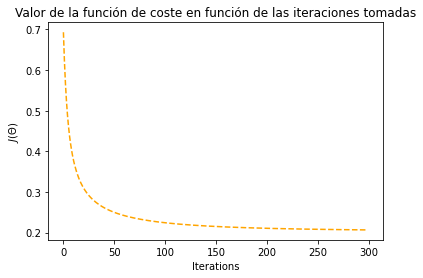

In [28]:
plt.plot(costs,'--',color = "orange")
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Valor de la función de coste en función de las iteraciones tomadas");